# [ICTCOG] 4기 경북대 기본반

## 기계학습 (7)

    
### 학습 과정
 
1. Raw Data
    - info
    - tidy data
    - eda
2. 필수 Pre-Processing
    - 결측치
    - encoding
        - label/ one-hot
3. holdout
    - 데이터 양 적은경우 cross validation
4. Pre-Processing
    - feature selection, scaling, dim reduction
5. training
6. hyperparameter Optimization
    - grid search CV
7. final model evaluation


### 비지도 학습
- 자기 스스로 학습하는 방법 DL에서 폭발
- 머신러닝


### clustering
- 비슷한 특성끼리 묶음을 찾는 방식
    
- 정답 데이터가 없어 정확성

In [1]:
from sklearn.datasets import load_iris

In [3]:
data=load_iris()

In [5]:
iris=pd.DataFrame(data.data,columns=data.feature_names)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
import pandas as pd
import seaborn as sns

정답값이 없으므로 해당 pairplot이 두 묶음으로 보임

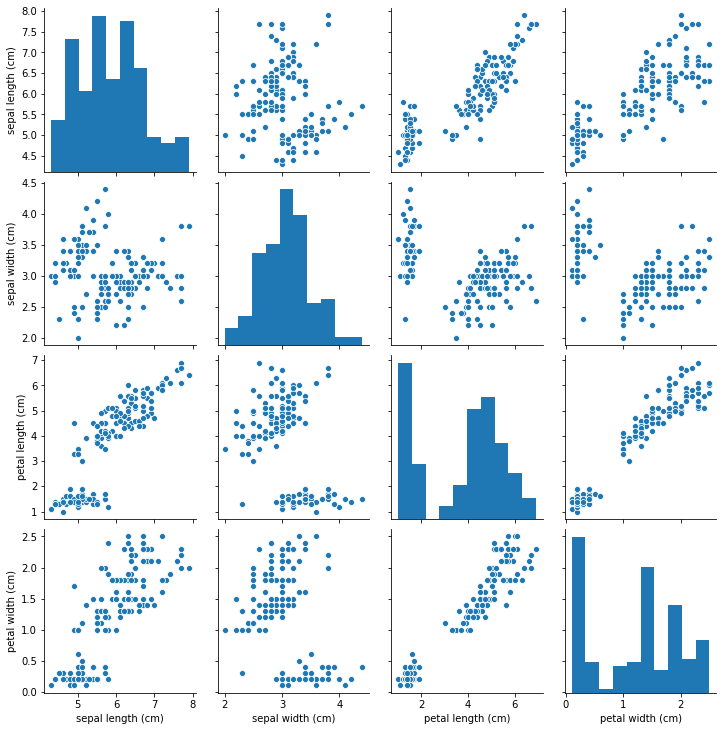

In [8]:
sns.pairplot(iris)

### K means
- 하이퍼파라미터 clustering 갯수 지정 (이것이 단점)

- n 묶음으로 가정
- 랜덤하게 n개의 점을 찍음 
- 가까운 값들을 찾고 평균으로 옮김을 반복 움직이지 않는 경우까지 실행

랜덤 초기값에 따라서 의도와 다르게 clustering 될 수 있음

In [9]:
import mglearn

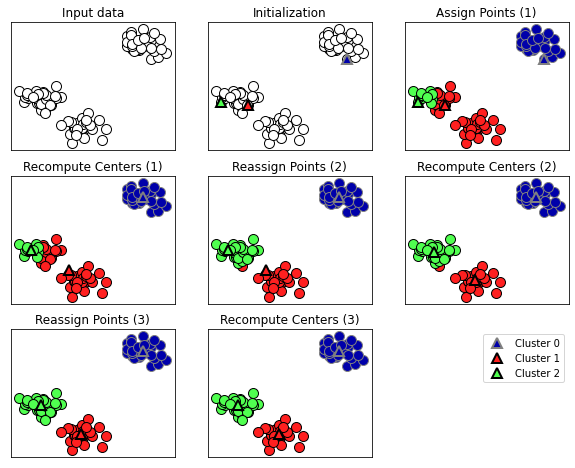

In [11]:
mglearn.plot_kmeans.plot_kmeans_algorithm()

In [12]:
from sklearn.cluster import KMeans

먼저 graph로 cluster갯수 예상하고 지정

In [20]:
km=KMeans(n_clusters=3)

In [21]:
km.fit(iris)

KMeans(n_clusters=3)

In [22]:
km.transform(iris)

array([[3.41925061, 0.14135063, 5.0595416 ],
       [3.39857426, 0.44763825, 5.11494335],
       [3.56935666, 0.4171091 , 5.27935534],
       [3.42240962, 0.52533799, 5.15358977],
       [3.46726403, 0.18862662, 5.10433388],
       [3.14673162, 0.67703767, 4.68148797],
       [3.51650264, 0.4151867 , 5.21147652],
       [3.33654987, 0.06618157, 5.00252706],
       [3.57233779, 0.80745278, 5.32798107],
       [3.3583767 , 0.37627118, 5.06790865],
       [3.32449131, 0.4824728 , 4.89806763],
       [3.31126872, 0.25373214, 4.9966845 ],
       [3.46661272, 0.50077939, 5.19103612],
       [3.90578362, 0.91322505, 5.65173594],
       [3.646649  , 1.01409073, 5.10804455],
       [3.49427881, 1.20481534, 4.88564095],
       [3.495248  , 0.6542018 , 5.03090587],
       [3.38444981, 0.1441527 , 5.02342022],
       [3.11245944, 0.82436642, 4.61792995],
       [3.37738931, 0.38933276, 4.97213426],
       [3.07471224, 0.46344363, 4.6955761 ],
       [3.31506588, 0.3286031 , 4.9236821 ],
       [3.

- 정답 데이터 없이 어느정도 잘 구분
    - setosa 는 모두 정답
    - virginica, versicolor 는 15개 틀림

In [23]:
km.fit_predict(iris)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [25]:
iris['target']=km.fit_predict(iris)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [18]:
km=KMeans(n_clusters=2)

In [19]:
km.fit_predict(iris)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

### DBSCAN
- cluster에 들어갈 범위(epsilon)와 최소 갯수에 따라 clustering
- kmeans 보다는 덜 정확함

In [26]:
from sklearn.cluster import DBSCAN

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


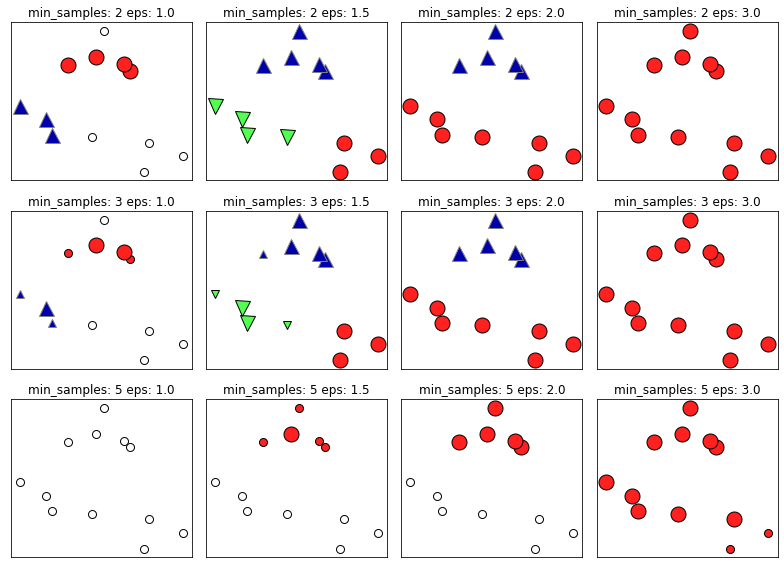

In [28]:
mglearn.plot_dbscan.plot_dbscan()

In [32]:
iris=pd.DataFrame(data.data,columns=data.feature_names)

In [38]:
db=DBSCAN(eps=1)

In [39]:
db.fit_predict(iris)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [42]:
db=DBSCAN(eps=0.1)

In [43]:
db.fit_predict(iris)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

- 알아서 3개의 묶음으로 찾음

In [47]:
db=DBSCAN()
db.fit_predict(iris)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [48]:
db.fit_predict(iris)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [49]:
vars(db)

{'eps': 0.5,
 'min_samples': 5,
 'metric': 'euclidean',
 'metric_params': None,
 'algorithm': 'auto',
 'leaf_size': 30,
 'p': None,
 'n_jobs': None,
 'n_features_in_': 4,
 'core_sample_indices_': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  16,  17,  19,  20,  21,  23,  24,  25,  26,  27,  28,  29,
         30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  42,  43,
         44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
         58,  61,  63,  65,  66,  67,  69,  70,  71,  72,  73,  74,  75,
         76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  88,  89,
         90,  91,  92,  94,  95,  96,  97,  99, 101, 102, 103, 104, 110,
        111, 112, 115, 116, 120, 121, 123, 124, 125, 126, 127, 128, 132,
        133, 136, 137, 138, 139, 140, 142, 143, 144, 145, 146, 147, 149]),
 'labels_': array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,

In [50]:
import numpy as np

In [51]:
np.unique(db.fit_predict(iris))

array([-1,  0,  1])

### Scipy
- 16개의 과학 분야에 많이 쓰는 함수와 기법을 Numpy기반으로 만들어 놓음

In [57]:
import scipy as sci

In [58]:
dir(sci) #

['ALLOW_THREADS',
 'AxisError',
 'BUFSIZE',
 'CLIP',
 'ComplexWarning',
 'DataSource',
 'ERR_CALL',
 'ERR_DEFAULT',
 'ERR_IGNORE',
 'ERR_LOG',
 'ERR_PRINT',
 'ERR_RAISE',
 'ERR_WARN',
 'FLOATING_POINT_SUPPORT',
 'FPE_DIVIDEBYZERO',
 'FPE_INVALID',
 'FPE_OVERFLOW',
 'FPE_UNDERFLOW',
 'False_',
 'Inf',
 'Infinity',
 'LowLevelCallable',
 'MAXDIMS',
 'MAY_SHARE_BOUNDS',
 'MAY_SHARE_EXACT',
 'MachAr',
 'ModuleDeprecationWarning',
 'NAN',
 'NINF',
 'NZERO',
 'NaN',
 'PINF',
 'PZERO',
 'RAISE',
 'RankWarning',
 'SHIFT_DIVIDEBYZERO',
 'SHIFT_INVALID',
 'SHIFT_OVERFLOW',
 'SHIFT_UNDERFLOW',
 'ScalarType',
 'TooHardError',
 'True_',
 'UFUNC_BUFSIZE_DEFAULT',
 'UFUNC_PYVALS_NAME',
 'VisibleDeprecationWarning',
 'WRAP',
 '_UFUNC_API',
 '__SCIPY_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__config__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__numpy_version__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_add_newdoc_ufunc',
 '_dep_fft',
 '_deprecated',
 '_d

In [56]:
np.info('arange')

     *** Found in numpy ***
arange([start,] stop[, step,], dtype=None)

Return evenly spaced values within a given interval.

Values are generated within the half-open interval ``[start, stop)``
(in other words, the interval including `start` but excluding `stop`).
For integer arguments the function is equivalent to the Python built-in
`range` function, but returns an ndarray rather than a list.

When using a non-integer step, such as 0.1, the results will often not
be consistent.  It is better to use `numpy.linspace` for these cases.

Parameters
----------
start : number, optional
    Start of interval.  The interval includes this value.  The default
    start value is 0.
stop : number
    End of interval.  The interval does not include this value, except
    in some cases where `step` is not an integer and floating point
    round-off affects the length of `out`.
step : number, optional
    Spacing between values.  For any output `out`, this is the distance
    between two adjacent v

In [67]:
sci.info(sci.cluster.vq)

K-means clustering and vector quantization (:mod:`scipy.cluster.vq`)

Provides routines for k-means clustering, generating code books
from k-means models, and quantizing vectors by comparing them with
centroids in a code book.

.. autosummary::
   :toctree: generated/

   whiten -- Normalize a group of observations so each feature has unit variance
   vq -- Calculate code book membership of a set of observation vectors
   kmeans -- Performs k-means on a set of observation vectors forming k clusters
   kmeans2 -- A different implementation of k-means with more methods
           -- for initializing centroids

Background information
----------------------
The k-means algorithm takes as input the number of clusters to
generate, k, and a set of observation vectors to cluster.  It
returns a set of centroids, one for each of the k clusters.  An
observation vector is classified with the cluster number or
centroid index of the centroid closest to it.

A vector v belongs to cluster i if it is c

/Users/MG/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: scipy.info is deprecated and will be removed in SciPy 2.0.0, use numpy.info instead
  """Entry point for launching an IPython kernel.


- 거리 별로 제일 가까운 값들끼리 계층적 grouping
- 어디서 자르냐에 따라서 묶음 갯수 결정

In [69]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [70]:
m=linkage(iris)

{'icoord': [[85.0, 85.0, 95.0, 95.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [225.0, 225.0, 235.0, 235.0],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [255.0, 255.0, 272.5, 272.5],
  [245.0, 245.0, 263.75, 263.75],
  [230.0, 230.0, 254.375, 254.375],
  [215.0, 215.0, 242.1875, 242.1875],
  [192.5, 192.5, 228.59375, 228.59375],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [210.546875, 210.546875, 302.5, 302.5],
  [175.0, 175.0, 256.5234375, 256.5234375],
  [165.0, 165.0, 215.76171875, 215.76171875],
  [325.0, 325.0, 335.0, 335.0],
  [365.0, 365.0, 375.0, 375.0],
  [395.0, 395.0, 405.0, 405.0],
  [385.0, 385.0, 400.0, 400.0],
  [415.0, 415.0, 425.0, 425.0],
  [392.5, 392.5, 420.0, 420.0],
  [370.0, 370.0, 406.25, 406.25],
  [355.0, 355.0, 388.125, 388.125],
  [435.0, 435.0, 445.0, 445.0],
  [371.5625, 371.5625, 440.0, 440.0],
  [345.0, 345.0, 405.78125, 40

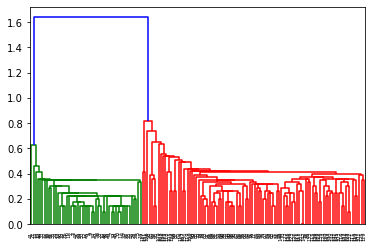

In [71]:
dendrogram(m)

In [72]:
import missingno as mino

<AxesSubplot:>

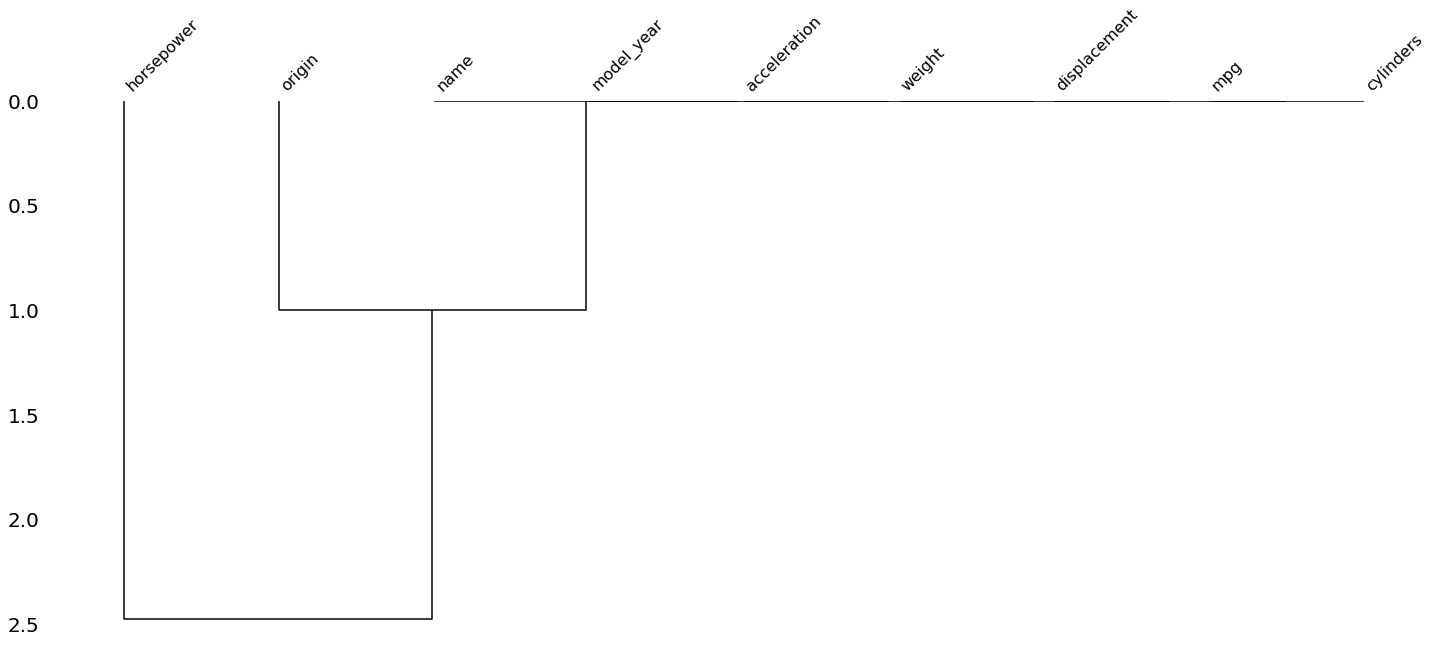

In [75]:
mpg=sns.load_dataset('mpg')
mpg.at[0,'origin']=None  #결측값 만들기 
mino.dendrogram(mpg) #결측값 dendrogram 

In [76]:
from sklearn.cluster import AgglomerativeClustering

In [77]:
ag=AgglomerativeClustering(3)

In [78]:
ag.fit_predict(iris)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

### PCA
- Principal Component Analysis 주성분 분석
- 고차원의 데이터를 더 작은 차원으로 데이터 값을 변화 시켜서 축소
- 분산이 최대가 되는 주요 축 기반으로 회전시켜도 특성은 변하지 않고 구분되는 특성은 유지됨을 알 수 있음 

> - feature selection  :filter, wrapper, embeded
    -  차원의 저주
    - 데이터 자체를 바꾸지 않고 feature 선택/제외함

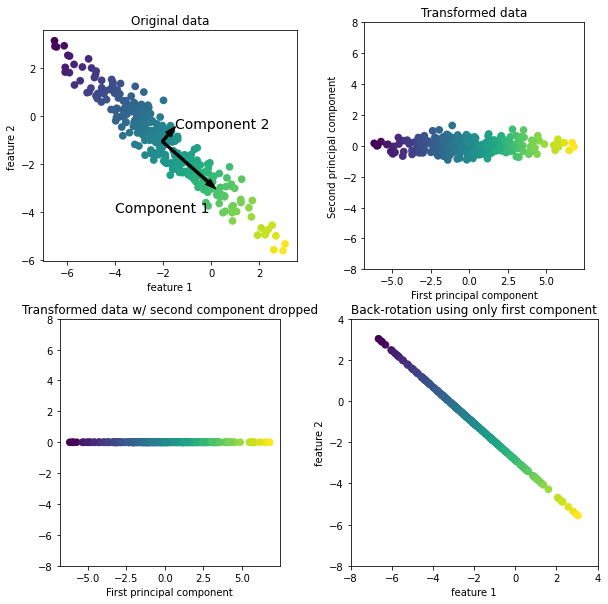

In [79]:
mglearn.plot_pca.plot_pca_illustration()

In [80]:
from sklearn.decomposition import PCA

In [81]:
pca=PCA(n_components=3)

In [82]:
pca.fit_transform(iris)

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272],
       [-2.50694709,  0.6450689 , -0.07531801],
       [-2.61275523,  0.01472994,  0.10215026],
       [-2.78610927, -0.235112  , -0.20684443],
       [-3.22380374, -0.51139459,  0.06129967],
       [-2.64475039,  1.17876464, -0.15162752],
       [-2.38603903,  1.33806233,  0.2777769 ],
       [-2.62352788,  0.81067951,  0.13818323],
       [-2.64829671,  0.31184914,  0.02666832],
       [-2.19982032,  0.87283904, -0.12030552],
       [-2.5879864 ,  0.51356031,  0.21366517],
       [-2.31025622,  0.39134594, -0.239

In [94]:
data=load_iris()
iris=pd.DataFrame(data.data)
iris['target']=data.target

iris2=pd.DataFrame(pca.fit_transform(iris))
iris2['target']=data.target
iris2

,0,1,2,target
0,-2.865415,0.296295,0.041871,0
1,-2.892047,-0.183785,-0.175541,0
2,-3.054980,-0.174827,0.049705,0
3,-2.920230,-0.331582,0.003376,0
4,-2.906852,0.295917,0.147160,0
...,...,...,...,...
145,2.173075,0.127588,0.320632,2
146,1.784888,-0.443191,0.052770,2
147,2.005296,0.010566,0.282866,2
148,2.134042,0.037797,0.756600,2


In [95]:
iris2

,0,1,2,target
0,-2.865415,0.296295,0.041871,0
1,-2.892047,-0.183785,-0.175541,0
2,-3.054980,-0.174827,0.049705,0
3,-2.920230,-0.331582,0.003376,0
4,-2.906852,0.295917,0.147160,0
...,...,...,...,...
145,2.173075,0.127588,0.320632,2
146,1.784888,-0.443191,0.052770,2
147,2.005296,0.010566,0.282866,2
148,2.134042,0.037797,0.756600,2


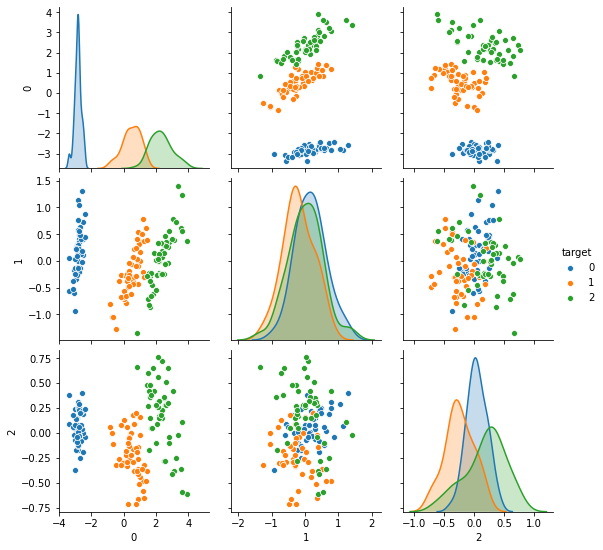

In [106]:
sns.pairplot(iris2,hue='target')

- PCA 전후 비교

In [99]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [98]:
cross_val_score(KNeighborsClassifier(),iris2.iloc[:,:-1],iris2.target,cv=10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [102]:
cross_val_score(KNeighborsClassifier(),iris.iloc[:,:-1],iris.target,cv=10)

array([1.        , 0.93333333, 1.        , 1.        , 0.86666667,
       0.93333333, 0.93333333, 1.        , 1.        , 1.        ])

In [100]:
cross_val_score(SVC(),iris2.iloc[:,:-1],iris2.target,cv=10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [101]:
cross_val_score(SVC(),iris.iloc[:,:-1],iris.target,cv=10)

array([1.        , 0.93333333, 1.        , 1.        , 1.        ,
       0.93333333, 0.93333333, 0.93333333, 1.        , 1.        ])

### ICA
Independent Componenet Analysis
- 가장 독립적인을 찾음

In [107]:
from sklearn.decomposition import FastICA

In [108]:
ica=FastICA()

In [109]:
ica.fit_transform(iris.iloc[:,:-1])

array([[-1.13688992e-01,  2.42795866e-03, -3.06445267e-02,
        -2.13335226e-02],
       [-1.08560732e-01, -6.59333188e-03,  7.93577588e-02,
        -3.15443105e-02],
       [-1.10170742e-01, -1.29596816e-02,  2.85176440e-02,
         2.91532878e-02],
       [-9.83748704e-02,  2.54966453e-02,  3.10496136e-02,
         7.18829923e-02],
       [-1.12083365e-01,  8.81853844e-03, -6.01297651e-02,
         1.63856994e-02],
       [-1.03404955e-01, -2.07117958e-02, -1.20390015e-01,
        -2.11633397e-02],
       [-1.02740642e-01, -2.59134533e-02, -2.56555999e-02,
         8.55770000e-02],
       [-1.06714385e-01,  2.17367762e-02, -1.99821951e-02,
         6.65533607e-03],
       [-9.88894483e-02,  6.67175267e-03,  7.67653631e-02,
         8.36381723e-02],
       [-1.05290392e-01,  5.72753096e-02,  3.95071082e-02,
         3.70410000e-03],
       [-1.15053899e-01,  1.79769072e-02, -7.10140038e-02,
        -5.85723201e-02],
       [-9.81341504e-02,  4.74361736e-02, -3.88051018e-02,
      

In [110]:
iris3=pd.DataFrame(ica.fit_transform(iris))
iris3['target']=data.target
iris3

/Users/MG/opt/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


,0,1,2,3,4,target
0,-0.036316,0.005774,-0.117535,0.002196,-0.011524,0
1,-0.025229,-0.014059,-0.096435,-0.019022,0.094113,0
2,0.009256,-0.021128,-0.105866,-0.042582,0.027486,0
3,0.067559,0.000871,-0.097187,-0.044191,0.022751,0
4,-0.008292,0.008829,-0.121196,-0.007438,-0.049499,0
...,...,...,...,...,...,...
145,-0.167570,-0.158490,0.090057,-0.020642,0.018623,2
146,-0.130196,-0.020367,0.076365,-0.104036,0.087121,2
147,-0.104710,-0.020582,0.067327,-0.065794,-0.029231,2
148,0.009253,-0.120567,0.080033,-0.060510,-0.163951,2


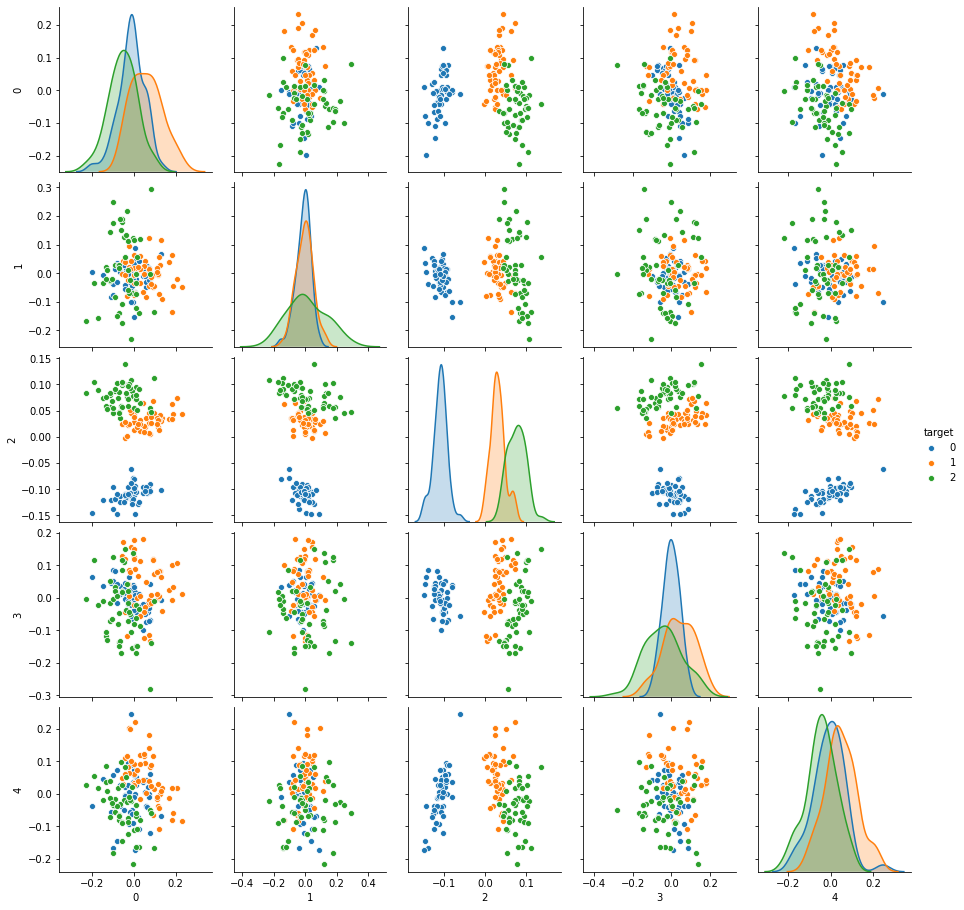

In [111]:
sns.pairplot(iris3,hue='target')

In [112]:
cross_val_score(SVC(),iris3.iloc[:,:-1],iris3.target,cv=10)

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.93333333, 1.        ])

- 단순히 수학 이용해서 변환시켜 정답데이터가 없어 비지도핛브으로 구분

### DummyClassifier
- 사람을 흉내냄
- 간단한 통계적 기법을 이용해서 분류

In [113]:
from sklearn.dummy import DummyClassifier#one-hot encoding

In [114]:
dummy=DummyClassifier( )
cross_val_score(DummyClassifier(),iris.iloc[:,:-1],iris.target,cv=10)

/Users/MG/opt/anaconda3/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


array([0.26666667, 0.4       , 0.2       , 0.33333333, 0.46666667,
       0.46666667, 0.2       , 0.33333333, 0.46666667, 0.4       ])

## 평가 척도

### 이상 탐지

- imbalacned dataset
- 높은 정확도보다 사기 탐지가 중요함

A:100개 중 99개 맞히고 사기 찾는 1개 틀림
B:100개 중 99개 맞히고 사기 맞추고 사기 아닌거 1개 틀림 
- 둘다 99%정확도이나 
- 다양한 평가 척도가 있음

### confusion matrix

|   |예측||
|---|:------------|:----------------------------|
|실제|True positive|False Negative(type 2 error) |
|   |False positive(type 1 error)| True Negative|

> - 제 2종오류 2Ne(type 2 - FN)

- 문제에 따라 중요한 metric 상이함
    - 예. 암환자: 2제종 오류 중요함
- precision = TP/(TP+TN)
- recall = TP/(TP+FP)

In [120]:
from sklearn.metrics import confusion_matrix

In [121]:
confusion_matrix(y_test, knn.predict(X_test))

array([[16,  0,  0],
       [ 0, 12,  2],
       [ 0,  0,  8]])

In [126]:
import numpy as np
np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([16, 14,  8]))

In [127]:
from sklearn.metrics import classification_report

In [128]:
print( classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.86      0.92        14
           2       0.80      1.00      0.89         8

    accuracy                           0.95        38
   macro avg       0.93      0.95      0.94        38
weighted avg       0.96      0.95      0.95        38

